In [1]:
#在执行此代码前，请确保完成了三个模型的推理任务，并生成了对应的预测结果文件

In [7]:
#######################################################
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.rcParams['axes.unicode_minus']=False # negative minus sign

import pickle
def save_data(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)
    print(f"Data saved to {filename}")
    
# 定义一个函数，用于加载文件中的数据
# 定义一个函数，用于加载文件中的数据
    # 打开文件，以二进制模式读取
def load_data(filename):
        # 使用pickle模块加载文件中的数据
    with open(filename, 'rb') as f:
    # 返回加载的数据
        data = pickle.load(f)
    return data


In [8]:
from pathlib import Path

# 获取当前脚本的路径
current_script_path = Path().resolve()

# 获取当前脚本所在的目录
current_dir = current_script_path.parent

# 获取上一级目录
parent_dir = current_dir.parent



In [11]:
df_want_hds_inrs=load_data(current_dir  / "HDs_INRs" / "data"/"df_want_l3_f1.pkl")
df_want_hds_irs=load_data(current_dir  / "HDs_IRs" / "data"/"df_want_l3_f1.pkl")
df_want_irs_inrs=load_data(current_dir  / "IRs_INRs" / "data"/"df_want_l3_f1.pkl")

In [12]:
# 假设第一列是索引
df_want_hds_inrs.set_index('celltype_L3', inplace=True)
df_want_hds_irs.set_index('celltype_L3', inplace=True)
df_want_irs_inrs.set_index('celltype_L3', inplace=True)
import pandas as pd
# 按索引对齐拼接
result = pd.concat([df_want_irs_inrs,df_want_hds_inrs, df_want_hds_irs], axis=1)

In [13]:
result.index = result.index.str.replace('_', ' ')

In [14]:
new_sort_shunxu=['CD4 Naive T-CCR7','CD4 Naive T-SOX4','CD4 Tcm-GPR183','CD4 Tcm-SOX4','CD4 Tcm-CXCR5','CD4 Tcm-IFIT3','CD4 Tfh like-CXCR5','CD4 Th-TNFRSF11A','CD4 Th1-GZMK','CD4 Th17-RORC','CD4 Th22-CCR10','CD4 Treg-FCRL3','CD4 Treg-FOXP3','CD8 Naive T-CCR7','CD8 Tcm-GPR183','CD8 Tcm-GZMK','CD8 Tem-GZMK','CD8 CTL-GZMK','CD8 CTL-GZMB','MAIT-SLC4A10','gdT2-GZMK','gdT2-GZMH','NKT-NCR1','NK bright-XCL1','Mature NK dim-FCGR3A','cMono-CD14','cMono-IFI44L','ncMono-FCGR3A','ncMono-IFI44L','cDC2-CD1C','Naive B-TCL1A','Switched Memory B-CD27','Switched Memory B-CD86']


In [15]:
result=result.loc[new_sort_shunxu]

In [16]:
result['celltype_L1']=['CD4']*13+['CD8']*10+['NK']*2+['my']*5+['zB']*3

In [17]:
df_sorted = result.sort_values(by=['celltype_L1', 'IRs_INRs'], ascending=[True, False])

In [18]:
df_sorted=df_sorted.drop(columns=['celltype_L1'])

In [19]:
import matplotlib.colors as mcolors
colors=["#FFFFFF",
"#D1DDDB",
"#85B8CB",
"#1D6A96",
"#283B42"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

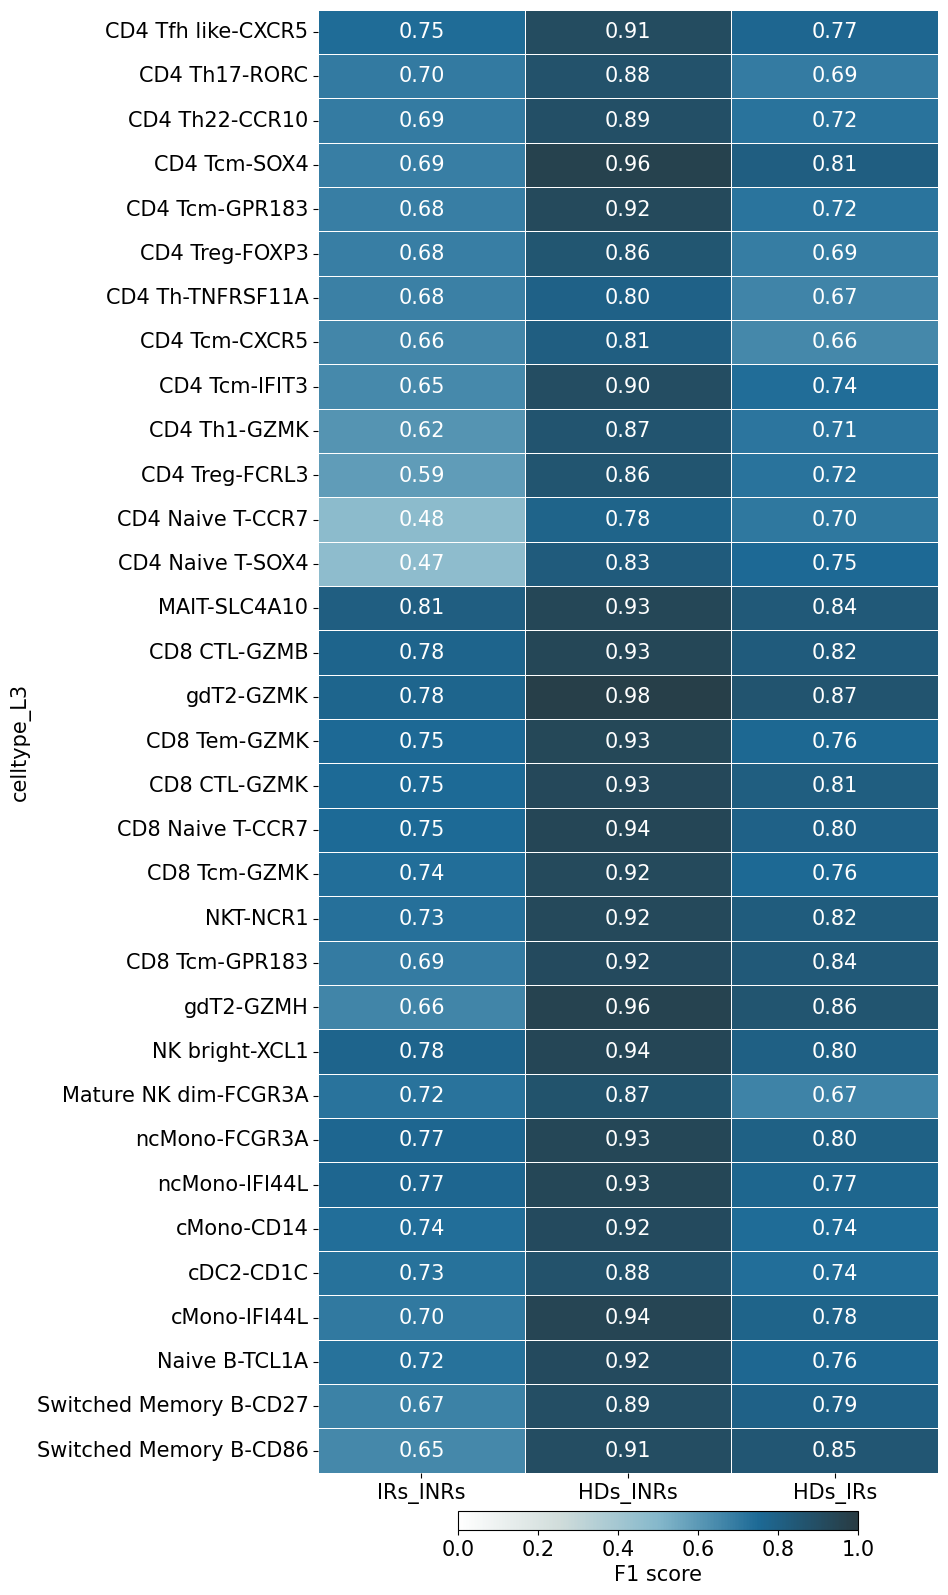

In [20]:
import pandas as pd
import seaborn as sns
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams ['font.size']=15
# 绘制热图

fig, ax =plt.subplots(figsize=(8, 19))  # 设置热图的大小
ax =sns.heatmap(df_sorted, annot=True,fmt=".2f", linewidths=0.5,cmap=cmap,vmin=0.0,vmax=1.0,annot_kws={"color": "white"}, cbar=False)
cbar_ax = fig.add_axes([0.3, 0.08, 0.5, 0.01])
fig.colorbar(ax.collections[0], cax=cbar_ax, orientation='horizontal',label="F1 score")

# plt.ylabel("")
# rect = plt.Rectangle((2, 3), 2, 2, facecolor='none', edgecolor='red', linewidth=2)
# ax.add_patch(rect)

# 显示热图
plt.show()